# Aula 5 - Exercícios - Gráficos
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [1]:
# Importe a biblioteca pandas
import pandas as pd
import seaborn as sns
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor


### 5.5 Faça o merge do dataset de morbidade com o dataset do índice de gini e plote um gráfico do tipo pairplot das seguintes variáveis (colunas): 'Internações',  'Óbitos', '2010' 



#### Dica: não tente plotar um pairplot de todas as variáveis, pois pode demorar bastante.
#### path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
#### path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'

In [57]:
# Plote aqui seu gráfico
path_morbidade = '../../data/originais/morbidade/consolidado/morbidade.csv'
path_gini = '../../data/originais/gini/ginibr.csv'

col_type = {
    "cod_ibge6": "string",
    "Óbitos": pd.Int64Dtype()
}

df_morbidade = pd.read_csv(path_morbidade, sep=";", header=0, decimal=",", low_memory=False, na_values="-", dtype=col_type)
df_morbidade.dtypes


Município                         object
Internações                      float64
AIH_aprovadas                      int64
Valor_total                      float64
Valor_serviços_hospitalares      float64
Val_serv_hosp_-_compl_federal    float64
Val_serv_hosp_-_compl_gestor     float64
Valor_serviços_profissionais     float64
Val_serv_prof_-_compl_federal    float64
Val_serv_prof_-_compl_gestor     float64
Valor_médio_AIH                  float64
Valor_médio_intern                object
Dias_permanência                 float64
Média_permanência                 object
Óbitos                             Int64
Taxa_mortalidade                  object
mes                               object
ano                                int64
mes_ano                           object
cod_ibge6                         string
dtype: object

In [59]:
df_gini = pd.read_csv(path_gini, sep=";", skiprows=2, header=0, encoding="utf-8", decimal=",", skipfooter=2 )
df_gini["cod_ibge6"] = df_gini["Município"].apply( lambda city: city[0:6] )
df_gini["cod_ibge6"]= df_gini["cod_ibge6"].astype("string")
df_gini

<ipython-input-59-2eaba3a68077>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_gini = pd.read_csv(path_gini, sep=";", skiprows=2, header=0, encoding="utf-8", decimal=",", skipfooter=2 )


,Município,1991,2000,2010,cod_ibge6
0,110001 Alta Floresta D'Oeste,0.5983,0.5868,0.5893,110001
1,110037 Alto Alegre dos Parecis,...,0.508,0.5491,110037
2,110040 Alto Paraíso,...,0.6256,0.5417,110040
3,110034 Alvorada D'Oeste,0.569,0.6534,0.5355,110034
4,110002 Ariquemes,0.5827,0.5927,0.5496,110002
...,...,...,...,...,...
5560,522200 Vianópolis,0.5622,0.6746,0.4672,522200
5561,522205 Vicentinópolis,0.6308,0.5934,0.4824,522205
5562,522220 Vila Boa,...,0.5308,0.4935,522220
5563,522230 Vila Propício,...,0.5299,0.5240,522230


In [62]:
df_morb_gini = pd.merge(df_morbidade, df_gini, on="cod_ibge6")
df_morb_gini.dtypes

Município_x                       object
Internações                      float64
AIH_aprovadas                      int64
Valor_total                      float64
Valor_serviços_hospitalares      float64
Val_serv_hosp_-_compl_federal    float64
Val_serv_hosp_-_compl_gestor     float64
Valor_serviços_profissionais     float64
Val_serv_prof_-_compl_federal    float64
Val_serv_prof_-_compl_gestor     float64
Valor_médio_AIH                  float64
Valor_médio_intern                object
Dias_permanência                 float64
Média_permanência                 object
Óbitos                             Int64
Taxa_mortalidade                  object
mes                               object
ano                                int64
mes_ano                           object
cod_ibge6                         string
Município_y                       object
1991                              object
2000                              object
2010                             float64
dtype: object

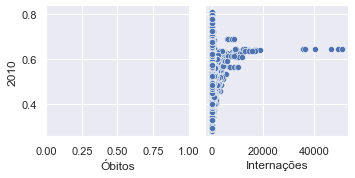

In [63]:
sns.pairplot(
    df_morb_gini,
    x_vars=["Óbitos", "Internações"],
    y_vars=["2010"]
)